Import required libraries

In [1]:
import glob, sys

from omegaconf import OmegaConf
from tqdm.auto import tqdm
from grams.prelude import GRAMS, ROOT_DIR, DATA_DIR, I, WikidataSemanticModelHelper
from sm.prelude import M, O

Create GRAMS instance. `DATA_DIR` is where GRAMS will store entities retrieved from Wikidata, `cfg` contains configuration of GRAMS.

In [2]:
cwd = ROOT_DIR / "examples/semtab2020_novartis"
cfg = OmegaConf.load(ROOT_DIR / "grams.yaml")
grams = GRAMS(DATA_DIR, cfg)

Load tables to annotate and their ground-truth

In [3]:
gt = [
    ([O.SemanticModel.from_dict(sm) for sm in r['semantic_models']], I.LinkedTable.from_dict(r['table']))
    for r in [M.deserialize_json(infile) for infile in glob.glob(str(cwd / "tables/*.json"))]
]

In [4]:
annotations = [grams.annotate(table) for sms, table in tqdm(gt)]

  0%|          | 0/50 [00:00<?, ?it/s]

Visualize the suggested annotations

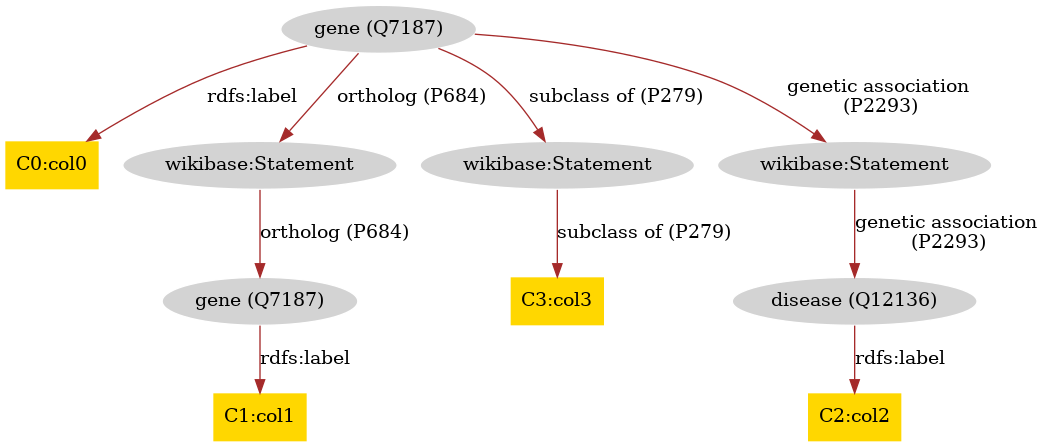

In [6]:
annotations[0].sm.draw()

Visualize the correct annotations

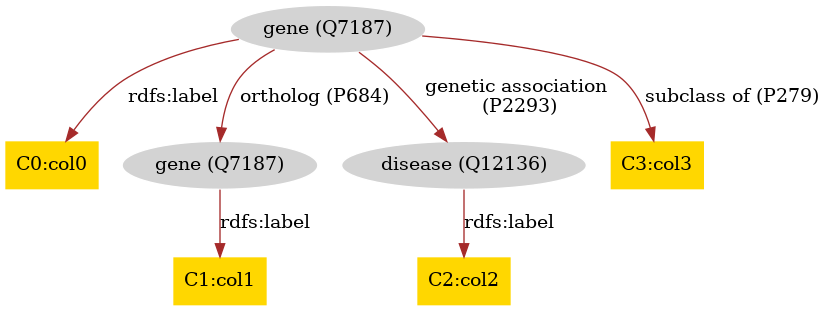

In [8]:
gt[0][0][0].draw()